활성화함수
  - 계단함수
    - 임계치가 넘어가면 1 그렇지 않으면 0 (비 연속적)
  - 시그모이드
    - 0 ~ 1사이의 연속적인 값으로 변경(연속적)
    - 기울기 소멸문제(미분값이 매우 작아짐)
      - 학습이 안됨(뉴런이 비활성화)
  - 렐루
    - 0보다크면 입력받은 그대로 출력, but 0으로 수렴
    - 입력이 음수이면 출력이 0, 그래서 일부 뉴런이 비활성화 됨
  - 리키렐루
    - 음수인경우 아주작은 값을 더해서 0가 되는것을 방지

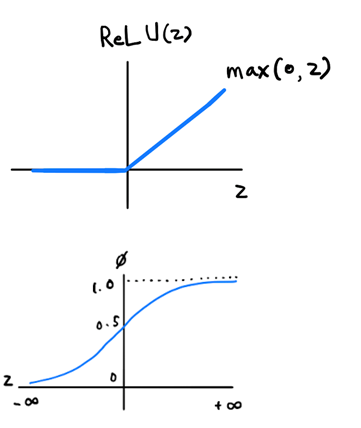

In [1]:
# 데이터 : 패션 mnist
# 신경망 : 심층신경망
# 활성화 함수 : relu

In [2]:
from tensorflow import keras

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

활성화 함수로 relu 적용

In [8]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


컴파일 - 어떻게 학습할 것인지

In [9]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

학습

In [10]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5055 - accuracy: 0.8204
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3457 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3259 - accuracy: 0.8821
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8871


옵티마이져
  - https://wikidocs.net/152765

In [12]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5079 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3794 - accuracy: 0.8625
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3452 - accuracy: 0.8748
Epoch 4/5
1

손실곡선

In [15]:
type(history.history)

dict

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

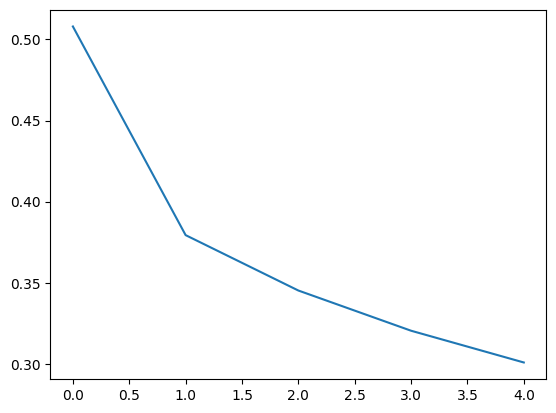

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

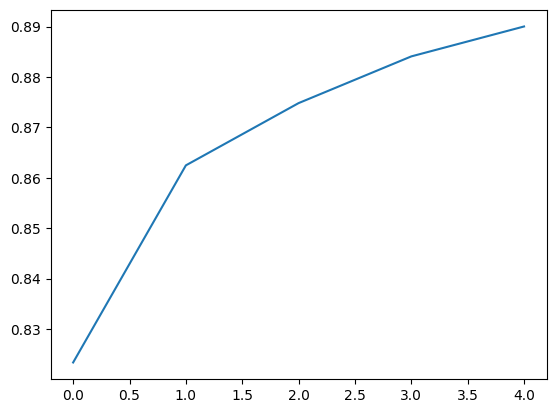

In [18]:
plt.plot(history.history['accuracy'])
plt.show()

더 많은 에포크

In [20]:
history = model.fit(x_train_scaled,y_train,epochs=20,verbose=0)

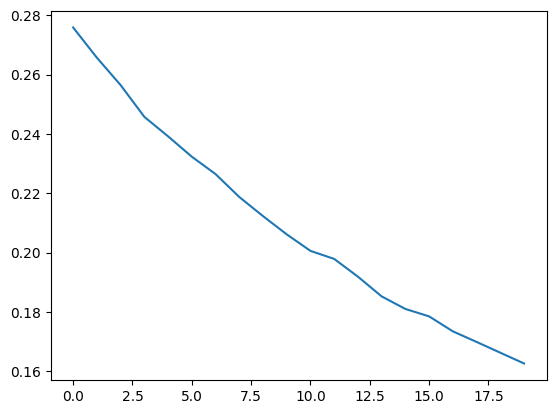

In [21]:
plt.plot(history.history['loss'])
plt.show()

In [24]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_test_scaled,y_test) )

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5042 - accuracy: 0.8249 - val_loss: 0.4163 - val_accuracy: 0.8527
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3794 - accuracy: 0.8639 - val_loss: 0.3891 - val_accuracy: 0.8612
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.8758 - val_loss: 0.3999 - val_accuracy: 0.8598
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3177 - accuracy: 0.8840 - val_loss: 0.3543 - val_accuracy: 0.8727
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3012 - accuracy: 0.8898 - val_loss: 0.3529 - val_accuracy: 0.8756
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2832 - accuracy: 0.8959 - val_loss: 0.3482 - val_accuracy: 0.8734
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2721 - accuracy: 0.8995 - val_loss: 0.3441 - val_accuracy:

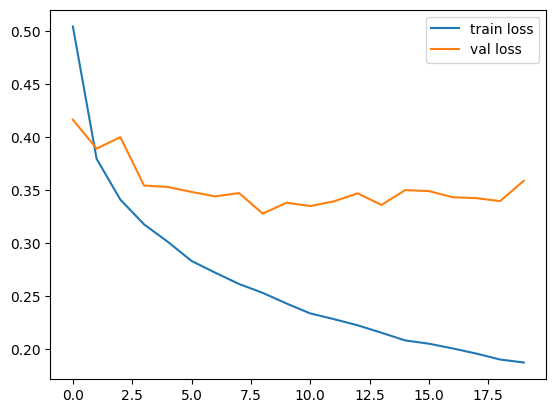

In [25]:
plt.plot(history.history['loss'],label='train loss')
# plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'],label='val loss')
# plt.plot(history.history['val_accuracy'])
plt.legend()
plt.show()


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5073 - accuracy: 0.8199 - val_loss: 0.4187 - val_accuracy: 0.8532
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3811 - accuracy: 0.8642 - val_loss: 0.4116 - val_accuracy: 0.8522
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3472 - accuracy: 0.8747 - val_loss: 0.4126 - val_accuracy: 0.8531
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3291 - accuracy: 0.8831 - val_loss: 0.3677 - val_accuracy: 0.8699
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8865 - val_loss: 0.3721 - val_accuracy: 0.8727
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3056 - accuracy: 0.8903 - val_loss: 0.3733 - val_accuracy: 0.8746
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2976 - accuracy: 0.8949 - val_loss: 0.3688 - val_accuracy:

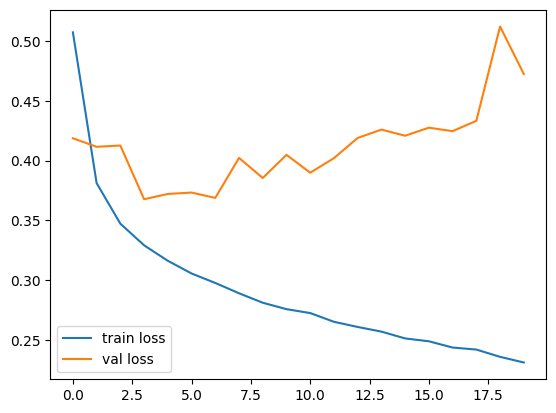

In [26]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_test_scaled,y_test) )
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

신경망 의 규제
  - 패널티를 부여해서 학습이 과도한 학습을 방지


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5653 - accuracy: 0.8017 - val_loss: 0.4310 - val_accuracy: 0.8447
Epoch 2/20
1875/1875 [===============

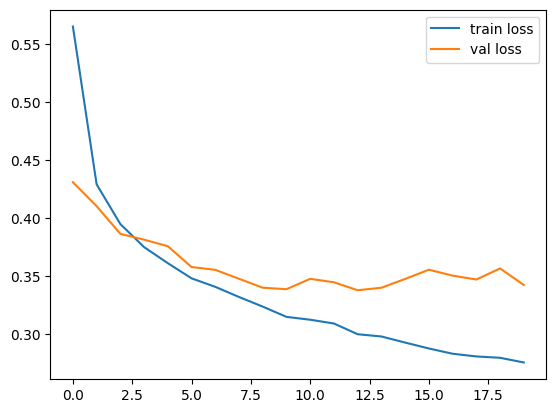

In [27]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_test_scaled,y_test) )
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

모델 저장
  - 가중치만 저장
    - 모델구조를 동일하게 만들고 불러와함
  - 전체저장
    - 그냥 불러옴

In [29]:
model.save_weights('/content/drive/MyDrive/deepLearning/model-weight.h5')

In [30]:
model.save('/content/drive/MyDrive/deepLearning/model-all.h5')

불러오기

In [31]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [32]:
# 해당모델에 가중치 적용하기
model.load_weights('/content/drive/MyDrive/deepLearning/model-weight.h5')

In [38]:
import numpy as np
np.mean(np.argmax(model.predict(x_test_scaled),axis=1) == y_test)

313/313 [==============================] - 0s 1ms/step


0.8821

불러오기2

In [39]:
model_all = keras.models.load_model('/content/drive/MyDrive/deepLearning/model-all.h5')

In [40]:
model_all.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8821


[0.34232842922210693, 0.882099986076355]

In [43]:
np.mean(np.argmax(model_all.predict(x_test_scaled),axis=-1) == y_test)

313/313 [==============================] - 1s 3ms/step


0.8821

CallBack
  - 사건(event)가 발생하면 실행되는 함수(function)
  - 때가 되면 실행된다..(사용자가 호출 안함)

In [44]:
from keras.api._v2.keras import callbacks
cb= keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/deepLearning/model-all2.h5')
hist = model_all.fit(x_train_scaled,y_train,epochs=20,
              validation_data=(x_test_scaled,y_test),
              callbacks = [cb] )

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2726 - accuracy: 0.8979 - val_loss: 0.3447 - val_accuracy: 0.8841
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2684 - accuracy: 0.8993 - val_loss: 0.3427 - val_accuracy: 0.8813
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2679 - accuracy: 0.8989 - val_loss: 0.3545 - val_accuracy: 0.8835
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2628 - accuracy: 0.9010 - val_loss: 0.3537 - val_accuracy: 0.8819
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2636 - accuracy: 0.9007 - val_loss: 0.3391 - val_accuracy: 0.8831
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9014 - val_loss: 0.3523 - val_accuracy: 0.8816
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2567 - accuracy: 0.9019 - val_loss: 0.3516 - val_accuracy:

Eary Stop(조기종료)

In [46]:
cb_stop = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
cb= keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/deepLearning/model-all3.h5')

In [47]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=200,
                     validation_data=(x_test_scaled,y_test),
                     callbacks=[cb,cb_stop] )

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5622 - accuracy: 0.8012 - val_loss: 0.4221 - val_accuracy: 0.8487
Epoch 2/200
1875/1875 [=============

In [48]:
cb_stop.stopped_epoch

9

시각화 - loss(train,test)

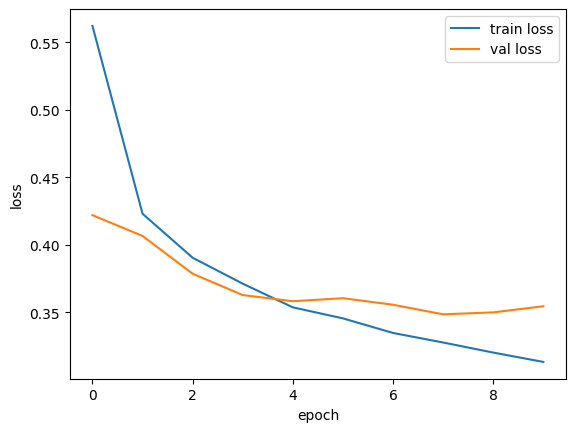

In [50]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

딥러닝 프로세스(tensorflow keras library)
  - 층을 만든다...
  - layers
  - Dense층 -- DNN
    - 한개 (단순) -- ANN
    - 여러개(심층) -- DNN
  - 모델
    - 층을 결합
      - Sequence
  - 컴파일
    - 최적화(옵티마이져)
    - 손실함수
    - 평가방법
  - 학습
    - 훈련데이터,정답,에포크,validation_data, 콜백
  - 저장
    - 가중치
    - 전체
  - 불러오기
    - 가중치는 저장되었던 가중치의 모델구조를 동일하게 만들고 적용 이때 predict만 가능
    - 전체저장은 그냥 불러옴.. 이때 evaluate predict 전부 가능
